In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as sciint
import scipy.signal as sig
import scipy
from itertools import product
from functools import partial

import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis import nulclines as nuc
from wilson_cowan_2d.analysis import stability as sta

# Jupyter Specific
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import clear_output

%load_ext autoreload
%autoreload 2

In [2]:
sz = 100
rang = np.linspace(-21, 21, sz)
array_x = rang.copy()
array_y = rang.copy()
xx, yy = np.meshgrid(rang, rang)
dist_2norm = decreasing_exponential(la.norm(np.stack((xx, yy)), axis=0), 8)
# dist_2norm /= dist_2norm.sum()

In [3]:
u = np.eye(3)
v=  2*np.eye(3)

In [4]:
uv = np.concatenate((u.ravel(), v.ravel()))

In [5]:
u,v = uv.reshape(2, 3, 3)

In [6]:
test_grid = np.zeros((sz, sz))
test_grid[sz//2-2:sz//2+2, sz//2-2:sz//2+2] = 1

In [7]:
out = sig.convolve2d(test_grid, dist_2norm, 'same', boundary='symm')

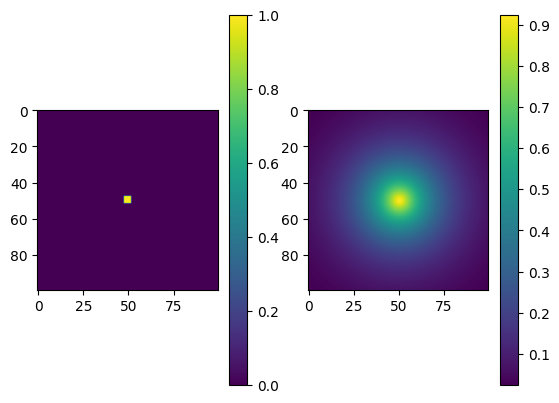

In [8]:
fig, ax = plt.subplots(1,2)
cb = ax[0].imshow(test_grid)
cb2 = ax[1].imshow(out)
_ = plt.colorbar(cb)
_ = plt.colorbar(cb2)

In [209]:
out.shape

(100, 100)